For the 158 known EBs in K2 Campaign 0, we injected a fake planet using Emma's code. This is an investigation of what we found. 

#Gather all data for exploration 

In [2]:
%matplotlib inline
import ketu, sys, pickle, shutil, os
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as pl
from astropy.io import fits, ascii
import remove_EB as remEB
import swarced as sw

In [3]:
path = "/k2_data/c0_known_EB_lc/"
contents = os.listdir(path)
contents = np.array([fn for fn in contents if ("_injected_clip.result" in fn)])
epicid = np.array([fn.split("-")[0][4:] for fn in contents],dtype=np.int32)
ref = ascii.read("/k2_data/c0_EB")
refrows = np.array([list(ref['KIC/EPIC']).index(ind) for ind in epicid])
refsub = ref[refrows]
eb_period = np.array([ref[i]['period'] for i in refrows])

Get all of the input parameters from the injected planets.

In [4]:
inj_center, inj_period, inj_rpbyrs, inj_tdepth, inj_tctime, inj_prad, inj_srad, inj_smass, inj_impact = [],[], [], [], [], [], [], [], []
for fn in contents:
    hdulist = fits.open(path + fn.split(".")[0] + ".fits")
    head = hdulist[3].header
    inj_period += [head['PERIOD']]
    inj_rpbyrs += [head['RRATIO']]
    inj_tdepth += [head['TDEPTH']]
    inj_tctime += [head['TCTIME']+hdulist[1].header['BJDREFI']]
    inj_prad += [head['PRADRJ']]
    inj_srad += [head['SRADRS']]
    inj_smass += [head['MSTAR']]
    inj_impact += [head['IMPACT']]
    inj_center += [hdulist[3].data['center'][0] +hdulist[1].header['BJDREFI']]
    hdulist.close()

Everythin is converted to numpy arrays. 

In [5]:
inj_period, inj_rpbyrs, inj_tdepth=np.array(inj_period), np.array(inj_rpbyrs), np.array(inj_tdepth)                                                   
inj_tctime, inj_prad, inj_srad = np.array(inj_tctime), np.array(inj_prad), np.array(inj_srad)
inj_smass, inj_impact =np.array(inj_smass), np.array(inj_impact)
inj_center = np.array(inj_center)
contents, epicid = np.array(contents), np.array(epicid)

Find the recovered period

In [6]:
recovered_period = []
for fn in contents:
    with open(path + fn,'r')as f:
        result = pickle.load(f)
        recovered_period += [result['peaks'][0]['period']]
recovered_period = np.array(recovered_period)

Ratio of recovery period to expected period

In [10]:
success = recovered_period / inj_period

#Overview 

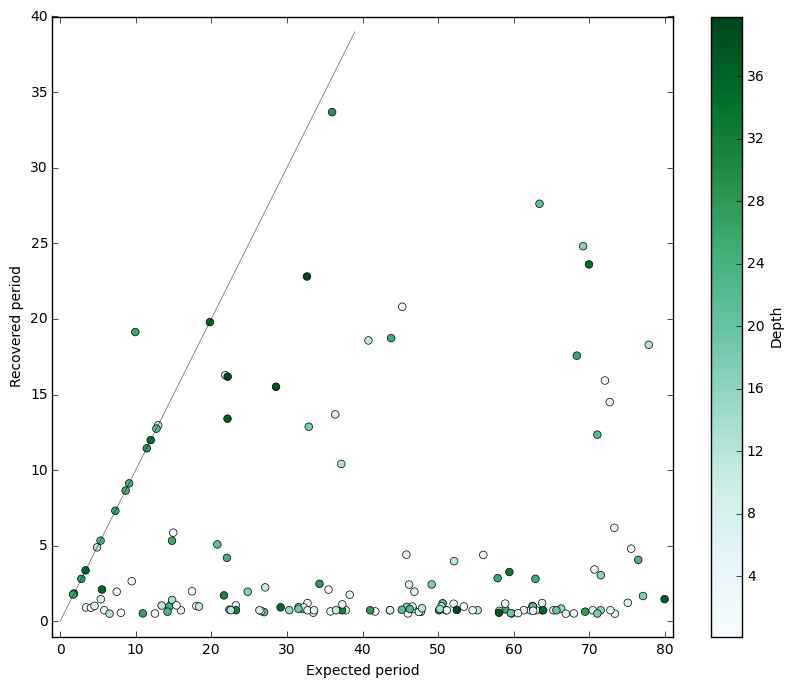

In [8]:
fig = pl.figure(figsize=(10,8))
pl.scatter(inj_period, recovered_period, c=inj_tdepth,cmap='BuGn', lw=0.5, s=30)
pl.colorbar(label= "Depth")
#pl.scatter(expected_period, second_recover, c='red',s=30,lw=0.5)
pl.plot(range(40), 'k',lw=0.3 )
pl.ylabel("Recovered period")
pl.xlabel("Expected period")
pl.xlim(-1,81)
pl.ylim(-1,40)

pl.show()

As you can see above, most of the planets were not properly detected. Only those on the plotted line match. 

In [11]:
sum((success > 0.8) * (success < 1.2)) #success is recovered_period/inj_period

15

So only 15 of the original 158 injections matched our expectation! You can see that many of the low injected planet depth (those with low $R_{*}/R_{p}$) have a recovered period near 0. However, There are certainly some with decent depths that one would think would be recovered that aren't. 